## Задачи по программированию к лекции 6

В этой лабораторной рабораторной работе мы сравним два метода оценивания параметров регрессионных моделей метод наименьших квадратов (OLS, ordinary least squares) и метод наименьших полных квадратов (TLS, total least squares). Для этого загрузим `numpy`. Для удобства работы с массивами данных можно также воспользоваться модулем `pandas`.

In [1]:
import numpy as np
import numpy.random as npr
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Задача 1. OLS vs TLS 

В отличие от обчного метода МНК (OLS), метод наименьших полных квадратов (TLS) учитывает ошибки как в зависимых, так и в независимых переменных. На рисунке ниже также представлен метод Data Least squares (DLS), который учитывает ошибки только по независимым переменным.

![image.png](image.png)

Для начала сгенерируем данные и визуоизируем их. Задача заключается в том, чтобы оценить вектор `beta` с помощью OLS и TLS.

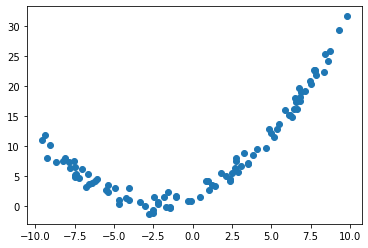

In [2]:
x = np.random.uniform(-10,10,100)
u = np.random.normal(0,1,100)
beta = [2,-1,0.2]
y = beta[0] - beta[1]*x + beta[2]*x**2 + u 
plt.scatter(x,y)

Создайте матрицу `X`: первая колонка &mdash; вектор из единиц, вторая колонка &mdash; $x$, третья колонка &mdash; $x^2$

In [3]:
X = np.ones((3, x.shape[0]))
X[1] = x
X[2] = x**2
X = X.T

#### OLS

Напишите функцию, на входе у которой матрицы `X` и `y`, на выходе вектор `b`, где $b_{OLS} = (X'X)^{-1}X'y$. 

In [4]:
from numpy.linalg import inv

def ols_est(X, y):
    return inv(X.T @ X) @ X.T @ y

In [5]:
answer = ols_est(X,y)


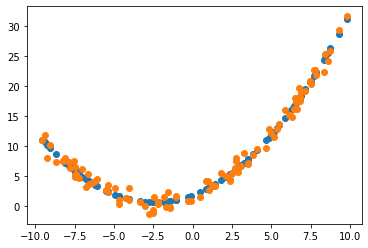

In [6]:
b = ols_est(X,y)
yest_ols = np.array([b[2]*v**2 + b[1]*v + b[0] for v in X.T[1]])
plt.scatter(X[:,1],yest_ols)
plt.scatter(X[:,1],y)

#### TLS

Напишите функцию, на входе у которой матрицы `X` и `y`, на выходе вектор `b`, полученнный по TLS:

- Шаг 1: Добавить справа столбец `y` к матрице `X` (размерности $n \times k$), где $k$ -- число регрессоров с константой, $n$ &mdash;  число наблюдений. 
- Шаг 2: Получить SVD разложение расширенной матрицы `X`.  
- Шаг 3: $b_{TLS} = -V_{X Y} V_{yy}^{-1}$, где $V$ &mdash; транспонированная матрица правых сингулярных векторов (размерности  $(k+1)\times (k+1)$), которую можно представить в виде матрицы из 4 блоков $V_{X X} ($размерности $k \times k)$, $V_{X y} ($размерности $ k \times 1)$, $V_{yX} ($размерности $ 1 \times k)$, $V_{yy} ($размерности $1\times 1)$.

$(*)$ $V_{X y}$ &mdash;  верхний правый блок матрицы $V$, состоящий из первых $k$ строк и последнего $ k+1$-ого   столбца,   $ V_{yy}$ &mdash; нижний правый блок матрицы $V$ ($k+1$ строка, $k+1$ столбец).

Подробнее почитать про доказательство этой формулы можно [здесь](http://people.duke.edu/~hpgavin/SystemID/CourseNotes/TotalLeastSquares.pdf).

In [7]:
from numpy.linalg import svd


def tls_est(X, y):
    k = X.shape[1]
    X_ = np.c_[X, y]
    
    U, S, Vt = svd(X_)
    
    Vt = Vt.T
    
    Vxy = Vt[:3, k]
    Vyy = np.array(Vt[k, k]).reshape(1, 1)

    tls = -Vxy * inv(Vyy.reshape(1, 1))
    
    return tls.flatten()

In [8]:
answer = tls_est(X,y)


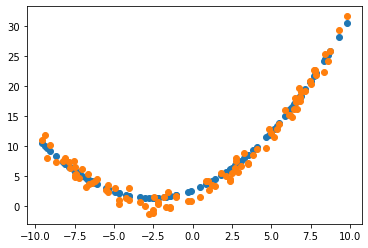

In [9]:
b=tls_est(X,y)
yest_tls = np.array([b[2]*v**2 + b[1]*v + b[0]  for v in X.T[1]])
plt.scatter(X[:,1],yest_tls)
plt.scatter(X[:,1],y)